In [14]:
import os

train_people_dir = os.path.join("train/people")
train_monkey_dir = os.path.join("train/monkey")
valid_people_dir = os.path.join("valid/people")
valid_monkey_dir = os.path.join("valid/monkey")

print("People training count: ", len(os.listdir(train_people_dir)))
print("Monkey training count: ", len(os.listdir(train_monkey_dir)))
print("People validation count: ", len(os.listdir(valid_people_dir)))
print("Monkey validation count: ", len(os.listdir(valid_monkey_dir)))

People training count:  363
Monkey training count:  362
People validation count:  137
Monkey validation count:  138


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

train_gen = train_datagen.flow_from_directory(
        'train/',
        classes = ['people', 'monkey'],
        target_size=(200, 200),
        batch_size=120,
        class_mode='binary')

valid_gen = valid_datagen.flow_from_directory(
        'valid/',
        classes = ['people', 'monkey'],
        target_size=(200, 200),
        batch_size=19,
        class_mode='binary',
        shuffle=False)

Found 725 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


In [18]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (200,200,3)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 120000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      15,360,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,360,257 (58.59 MB)

 Trainable params: 15,360,257 (58.59 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [20]:
history = model.fit(train_gen,
      steps_per_epoch=15,  
      epochs=15,
      verbose=1,
      validation_data = valid_gen,
      validation_steps=8)

Epoch 1/15
 7/15 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step - accuracy: 0.4726 - loss: 50.9533

C:\Users\ibadu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.4854 - loss: 44.4706 - val_accuracy: 0.9013 - val_loss: 0.3249
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.5662 - loss: 0.6656 - val_accuracy: 0.5395 - val_loss: 0.6810
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.7281 - loss: 0.5306 - val_accuracy: 0.9671 - val_loss: 0.2356
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - accuracy: 0.7961 - loss: 0.4419 - val_accuracy: 0.9671 - val_loss: 0.2093
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - accuracy: 0.8084 - loss: 0.4224 - val_accuracy: 0.9276 - val_loss: 0.2750
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.8374 - loss: 0.3696 - val_accuracy: 0.8421 - val_loss: 0.3835
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.8666 - loss: 0.3425 - val_accuracy: 0.9408 - val_loss: 0.2466
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - accuracy: 0.8835 - loss: 0.2982 - val_accuracy: 0.9868 - val

In [21]:
model.evaluate(valid_gen)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7282 - loss: 0.5802


[0.4113628566265106, 0.807272732257843]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[1.]
Get-to-know-the-Proboscis-Monkey-2-600x315-cropped.jpg is a monkey
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[1.]
monkey-pic.jpg is a monkey
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[0.]
non-child-725.png is a human
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[0.]
non-child-726.png is a human
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[0.]
non-child-727.png is a human
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[0.]
non-child-728.png is a human
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[0.]
non-child-729.png is a human
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[1.]
qrtpmldg_baby-monkey-generic_625x300_28_July_23.jpg is a monkey


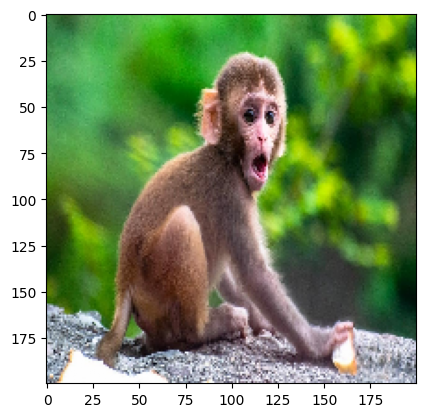

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

for fn in os.listdir('test'):
 
  # predicting images
  path = 'test/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a monkey")

In [30]:
model.save('my_model.keras')

In [31]:
loaded_model = tf.keras.models.load_model('my_model.keras')

C:\Users\ibadu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
[1.]
Get-to-know-the-Proboscis-Monkey-2-600x315-cropped.jpg is a monkey
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[1.]
monkey-pic.jpg is a monkey
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[0.]
non-child-725.png is a human
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[0.]
non-child-726.png is a human
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[0.]
non-child-727.png is a human
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[0.]
non-child-728.png is a human
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[0.]
non-child-729.png is a human
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[1.]
qrtpmldg_baby-monkey-generic_625x300_28_July_23.jpg is a monkey


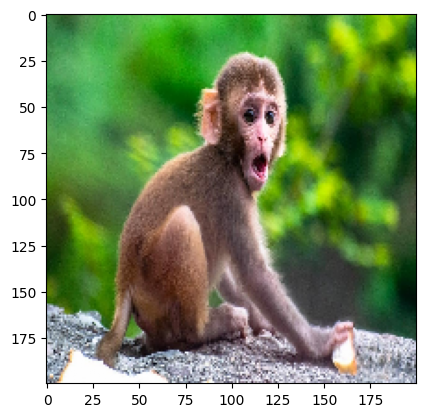

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

for fn in os.listdir('test'):
 
  # predicting images
  path = 'test/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = loaded_model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a monkey")